# 1. Importing the necessary packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

C:\Users\lavak\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Loading the data

In [3]:
df=pd.read_excel("data.xlsx")

In [4]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


# 3. Understanding the data

In [5]:
# drop Unnamed column as it not necessary
df['Unnamed: 0'].value_counts()

train    3998
Name: Unnamed: 0, dtype: int64

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(3998, 38)

# 4. Marks in the AMCAT Exam of all Candidates

In [10]:
l=[]
for i in range(23,len(df.columns)):
    l.append(df.columns[i])

In [11]:
l.insert(0,'ID')

In [12]:
df[l]

,ID,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


# 5. Checking the descriptive stat and info and null values of dataset

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [15]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [16]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

* The data does not have any null values in the data

# 6. Correlation between all columns

In [17]:
df.corr()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.247294,0.044547,0.673102,0.007069,0.284540,0.035160,0.047144,0.284540,-0.035977,...,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.175557,0.024837,0.120979,-0.146289,0.031359
Salary,-0.247294,1.000000,0.177373,-0.161383,0.170254,-0.118690,-0.179332,0.130103,-0.118690,0.015384,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.044547,0.177373,1.000000,0.269957,0.643378,0.021082,-0.126042,0.312538,0.021082,0.116707,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,0.673102,-0.161383,0.269957,1.000000,0.259166,0.254021,0.027691,0.086001,0.254021,-0.003016,...,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.007069,0.170254,0.643378,0.259166,1.000000,0.022336,-0.100771,0.346137,0.022336,0.130462,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeTier,0.035160,-0.179332,-0.126042,0.027691,-0.100771,0.067054,1.000000,-0.086781,0.067054,-0.101494,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.047144,0.130103,0.312538,0.086001,0.346137,0.017240,-0.086781,1.000000,0.017240,0.017471,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeCityTier,-0.035977,0.015384,0.116707,-0.003016,0.130462,0.007757,-0.101494,0.017471,0.007757,1.000000,...,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790


# 8.1  Frequency Distribution of Each Column

In [19]:
for col in df.columns:
    if df[col].dtype in ['int64','float64','object']:
        freq_dist=df[col].value_counts()
        print("Frequency distribution for column",col,":\n",freq_dist)

Frequency distribution for column ID :
 203097     1
283847     1
1118955    1
327371     1
587792     1
          ..
355018     1
806160     1
102065     1
462964     1
324966     1
Name: ID, Length: 3998, dtype: int64
Frequency distribution for column Salary :
 300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: Salary, Length: 177, dtype: int64
Frequency distribution for column DOL :
 present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2005-03-01 00:00:00       1
2015-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64
Frequency distribution for column Designation :
 software engineer                    539
software developer                   265
system engineer

* From this frequency distribution we can see the numbers of each sub category.

# 8.2 Probability Distribution of Each Column 

In [20]:
for col in df.columns:
    if df[col].dtype in ['int64','float64','object']:
        freq_dist=df[col].value_counts(normalize=True)
        print("Frequency distribution for column",col,":\n",freq_dist)

Frequency distribution for column ID :
 203097     0.00025
283847     0.00025
1118955    0.00025
327371     0.00025
587792     0.00025
            ...   
355018     0.00025
806160     0.00025
102065     0.00025
462964     0.00025
324966     0.00025
Name: ID, Length: 3998, dtype: float64
Frequency distribution for column Salary :
 300000     0.073287
180000     0.059780
200000     0.051276
325000     0.047024
120000     0.041271
             ...   
2050000    0.000250
144000     0.000250
1320000    0.000250
755000     0.000250
925000     0.000250
Name: Salary, Length: 177, dtype: float64
Frequency distribution for column DOL :
 present                0.468984
2015-04-01 00:00:00    0.143322
2015-03-01 00:00:00    0.031016
2015-05-01 00:00:00    0.028014
2015-01-01 00:00:00    0.024762
                         ...   
2005-03-01 00:00:00    0.000250
2015-10-01 00:00:00    0.000250
2010-02-01 00:00:00    0.000250
2011-02-01 00:00:00    0.000250
2010-10-01 00:00:00    0.000250
Name: DOL, Le

# 9. Dataset Column Observation & Data Cleaning

# 9.1 Designation Column Observation

* From the designation column we can see that an employee is from which engineering field 
* for this reason let's find some of the designation

In [21]:
df.Designation.value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [22]:
df.Designation.value_counts().shape

(419,)

* It means there are total 419 Specialization of the employees

In [23]:
# to check the "get" designation
df[df["Designation"]=="get"][["Designation","JobCity","Salary","Specialization"]]

,Designation,JobCity,Salary,Specialization
4,get,Manesar,200000,electronics and communication engineering
332,get,-1,180000,mechanical and automation
350,get,Faridabad,340000,electrical engineering
1717,get,Hyderabad,145000,mechanical engineering
1897,get,Hyderabad,175000,mechanical engineering
2140,get,Indore,600000,mechanical engineering
2318,get,Lucknow,220000,electronics and electrical engineering
2443,get,kharagpur,110000,mechanical engineering
2666,get,Hyderabad,200000,electronics and electrical engineering
2757,get,Nashik,350000,mechanical engineering


* we can see that the "get" post is only for ME and ECE

* Similarly we can check the designation for other departments(eg:CSE,EE etc.)

In [24]:
df.Specialization.value_counts().shape

(46,)

* It means there are total 46 Specialization of the employees

In [25]:
fld=df.Specialization.unique()

In [26]:
for i in fld:
    rg=df[df["Specialization"]== i]
    print("***********************************{}*****************************************".format(i))
    print("There are total {} designations".format(len(rg.Designation.unique())))
    print("The Designation for {} are - {}".format(i,rg.Designation.unique()))

***********************************computer engineering*****************************************
There are total 131 designations
The Designation for computer engineering are - ['senior quality engineer' 'senior software engineer'
 'senior php developer' 'software engineer' 'systems engineer'
 'application developer' 'programmer analyst' 'software developer'
 'php developer' 'qa analyst' 'senior systems engineer'
 'project coordinator' 'sap consultant' 'quality analyst'
 'project engineer' 'test engineer' 'web developer' 'system administrator'
 '.net developer' 'java developer' 'android developer'
 'junior software engineer' 'data analyst' 'senior software developer'
 'java software engineer' 'operations assistant'
 'associate software engineer' 'research analyst' 'operations executive'
 'software architect' 'designer' 'business analyst'
 'software test engineer' 'senior engineer' 'technical support engineer'
 'process associate' 'windows systems administrator'
 'javascript developer' 

# 9.2 Job City Column Observation

In [27]:
df.JobCity.value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

# 10. Data Visualisation

# Univariate Analysis

# 10.1  Now taking the Jobcity wise population

In [28]:
city=df.JobCity.value_counts()[:10]

In [29]:
city

Bangalore    627
-1           461
Noida        368
Hyderabad    335
Pune         290
Chennai      272
Gurgaon      198
New Delhi    196
Mumbai       108
Kolkata       98
Name: JobCity, dtype: int64

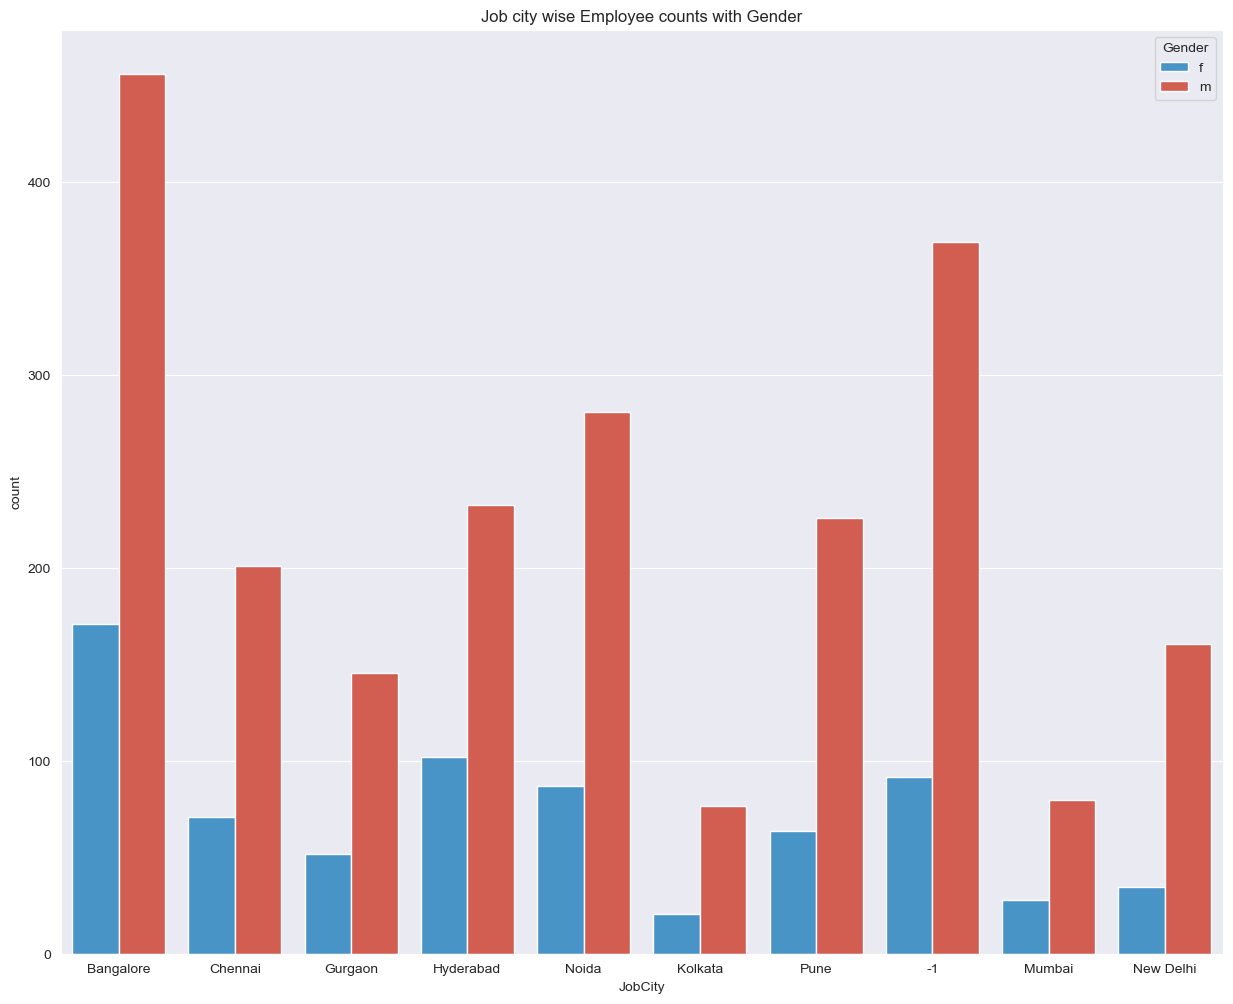

In [30]:
job=df[df["JobCity"].isin(city.index)]
plt.figure(figsize=(15,12))
sns.set_style("darkgrid")
sns.countplot(x="JobCity", hue="Gender", data=job, palette=["#3498db","#e74c3c"])
plt.title("Job city wise Employee counts with Gender")
plt.show()

# 10.2 Gender Column Observation

In [31]:
df.Gender = df.Gender.str.replace('m', 'Male')
df.Gender = df.Gender.str.replace('f', 'Female')

In [32]:
gen=df.Gender.value_counts()
gen

Male      3041
Female     957
Name: Gender, dtype: int64

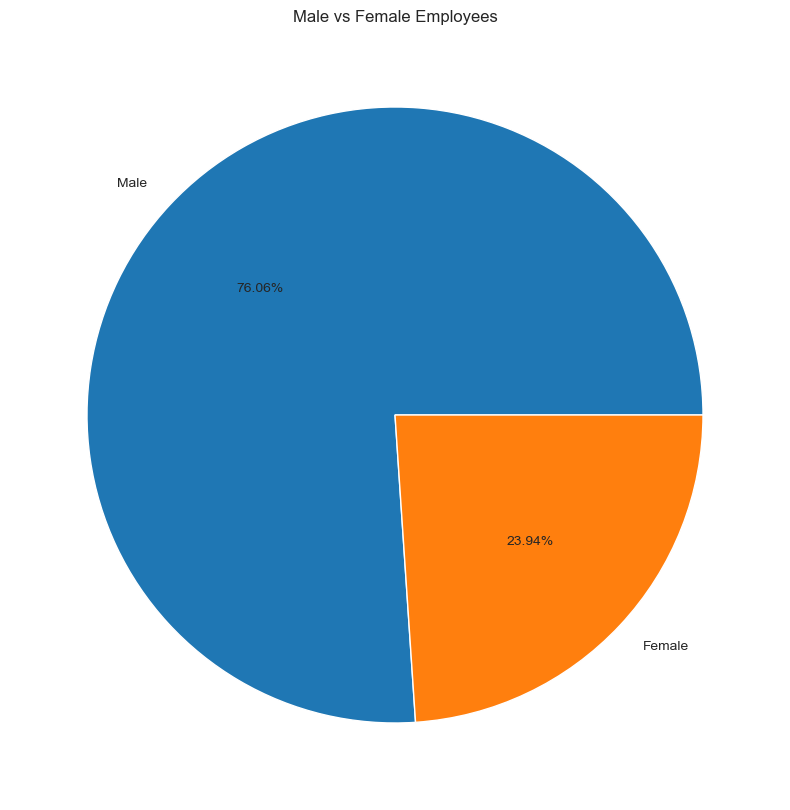

In [33]:
plt.figure(figsize=(10,10))
plt.pie(gen,labels=gen.index,autopct= "%1.2f%%")
plt.title("Male vs Female Employees")
plt.show()

* Male are 3 times than Female

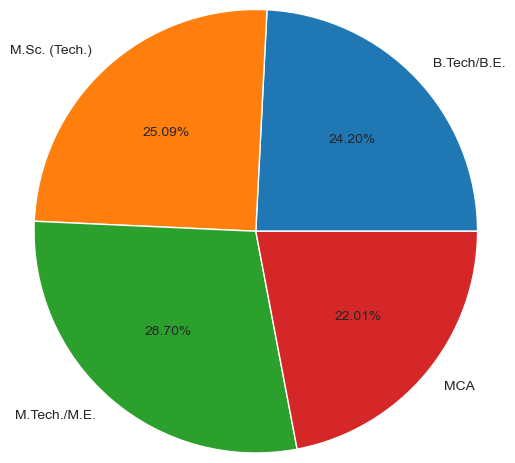

In [54]:
b=df.groupby(['Degree'])['Salary'].mean()
fig=plt.pie(b,labels=b.index,autopct = '%1.2f%%',radius = 1.5)

* The above Pie chart shows mean salary of different Degree.

<AxesSubplot:xlabel='count', ylabel='12graduation'>

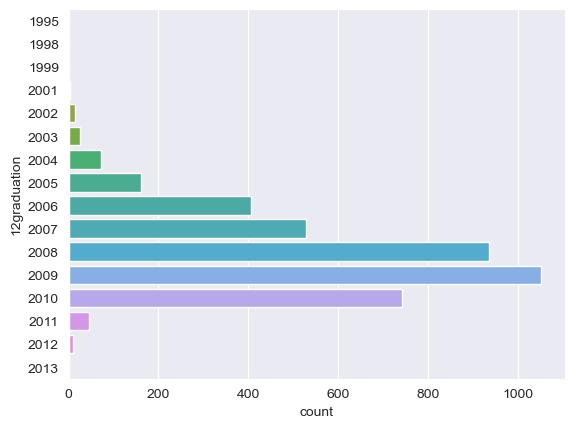

In [34]:
sns.countplot(y =df['12graduation'])

* from the above plot we can see that 2009 year has the more 12th graduated caandidates.

<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

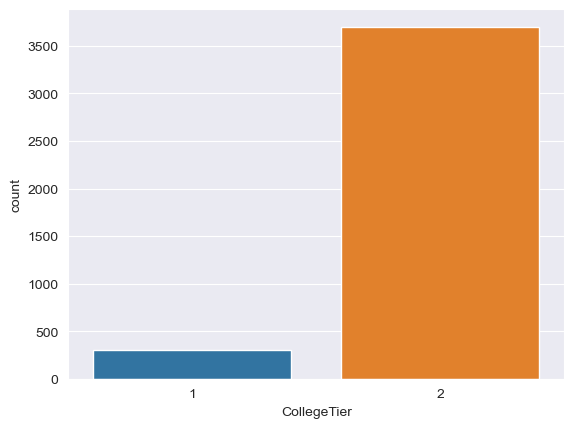

In [35]:
sns.countplot(x =df['CollegeTier'])

* from the above plot we can observe that the dataset contains much more students from Teir 2 college.

<AxesSubplot:xlabel='Degree', ylabel='count'>

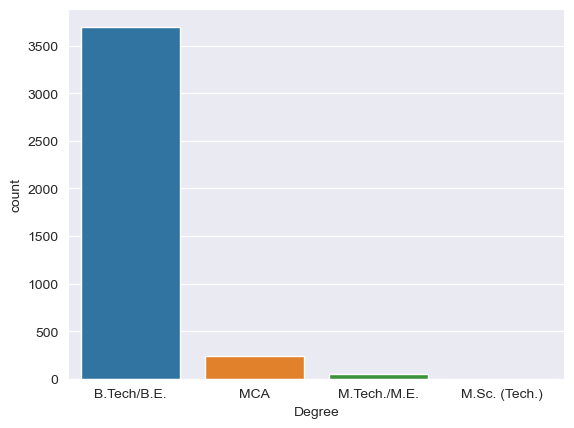

In [36]:
sns.countplot(x=df['Degree'])

* From above plot we can see that B.Tech/B.E students are very high count most of the students are B.Tech/B.E graduates.

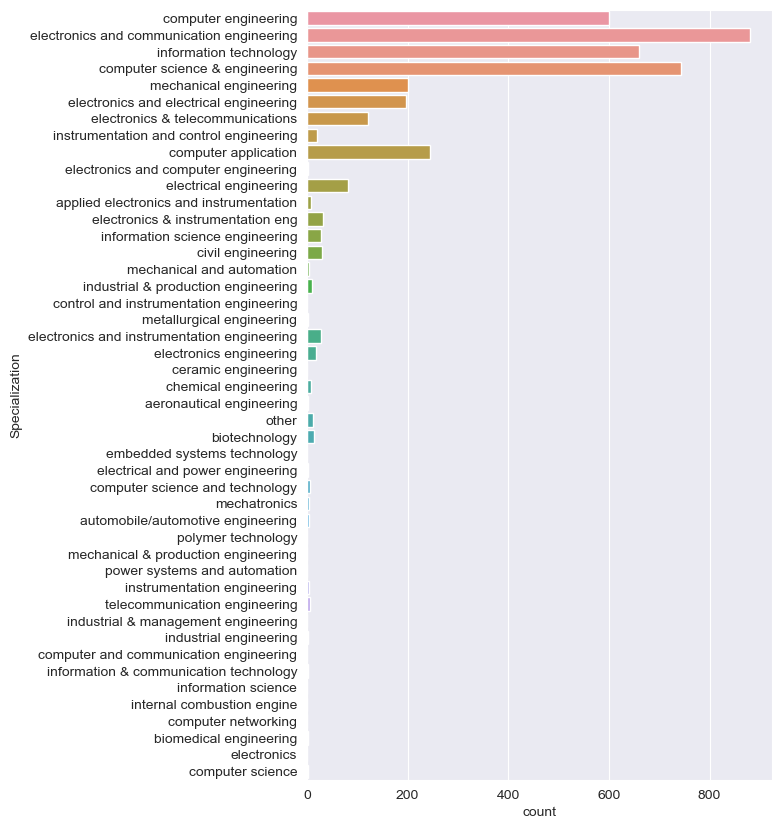

In [37]:
plt.figure(figsize = (6,10))
sns.countplot(y=df['Specialization'])
plt.show()

* From the plot above we observe that Electronics and communication is having more count and computer science and engineering.
* It means that mostlly students has the specialoization in electronics and computer science.

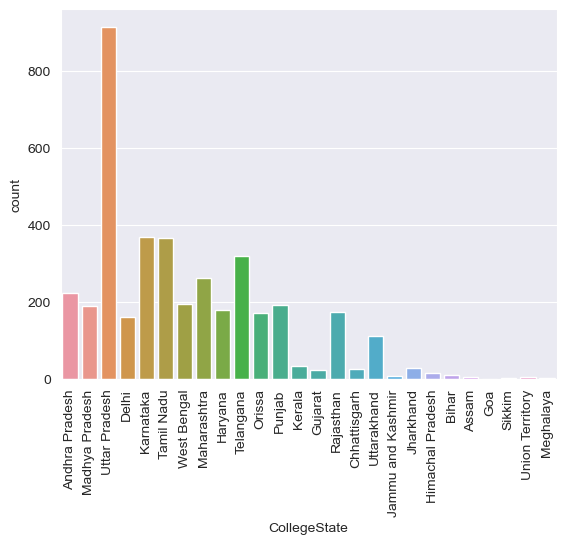

In [38]:
sns.countplot(x=df['CollegeState'])
plt.xticks(rotation='vertical')
plt.show()

* From the above plot most of the students are from Uttar Pardesh and very less are from Meghalaya

<AxesSubplot:xlabel='GraduationYear', ylabel='count'>

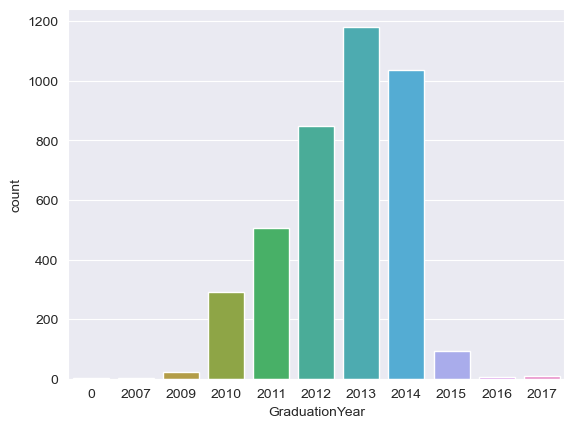

In [39]:
sns.countplot(x=df['GraduationYear'])

* Above graph shows that we have more 2013 graduates and very less 2007,2016,2017 graduates in the dataset.

# Salary Comparision of Male and Female

In [42]:
df.groupby("Gender")["Salary"].mean()

Gender
Female    294937.304075
Male      311716.211772
Name: Salary, dtype: float64

* The average salary of Male Employees are 311716.21
* The average salary of Female Employees are 294937.30

# Distribution plot of Gender in their Salary

C:\Users\lavak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lavak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 800x1000 with 0 Axes>

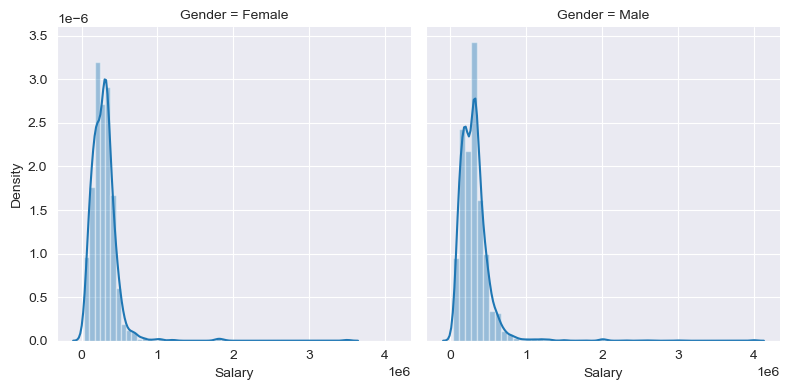

In [41]:
plt.figure(figsize=(8,10))
sns.FacetGrid(df,col="Gender",height=4).map(sns.distplot,"Salary")
plt.show()

* From the above plot we can easily say that both of the genders are right skewed means 
the outliers are present at the right side or at the upper value of salary
* Also the distribution of the both genders are quite same

# Gender in Different Designation

In [44]:
des=df.Designation.value_counts()[:20]

In [45]:
des

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
test engineer                  57
web developer                  54
application developer          52
assistant manager              52
network engineer               51
data analyst                   49
business analyst               49
engineer                       47
android developer              46
Name: Designation, dtype: int64

# Now we will look into the top 10 designation wise employees and it data

In [46]:
data=df[df["Designation"].isin(des.index)]

In [47]:
data

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1,579905,500000,2013-09-01,present,assistant manager,Indore,Male,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,Female,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,Male,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194
5,1027655,300000,2014-06-01,present,system engineer,Hyderabad,Male,1992-07-02,89.92,state board,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608
6,947847,300000,2014-08-01,2015-05-01 00:00:00,java software engineer,Banglore,Male,1993-02-01,86.08,state board,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,439787,280000,2012-11-01,present,network engineer,New Delhi,Female,1990-01-16,86.70,cbse board,...,-1,-1,-1,-1,-1,-1.4992,-1.8393,-0.7794,1.4724,-2.3017
3988,466661,200000,2013-02-01,2013-07-01 00:00:00,data analyst,Bangalore,Female,1991-05-15,74.40,0,...,-1,-1,-1,-1,-1,-0.5332,-0.1232,-0.0537,1.3255,0.5024
3989,1204604,300000,2014-09-01,present,software engineer,Bangalore,Male,1991-11-23,74.88,state board,...,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.0333,0.6721
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,Male,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.6498,-0.9194


# Genderwise Employees in each Designation

In [86]:
des=data.groupby(["Gender","Designation"]).size().reset_index(name="count")
des.pivot(index="Designation",columns="Gender",values="count")

Gender,Female,Male
Designation,,
android developer,14,32
application developer,16,36
assistant manager,7,45
business analyst,19,30
data analyst,16,33
engineer,5,42
java developer,17,50
java software engineer,14,97
network engineer,8,43


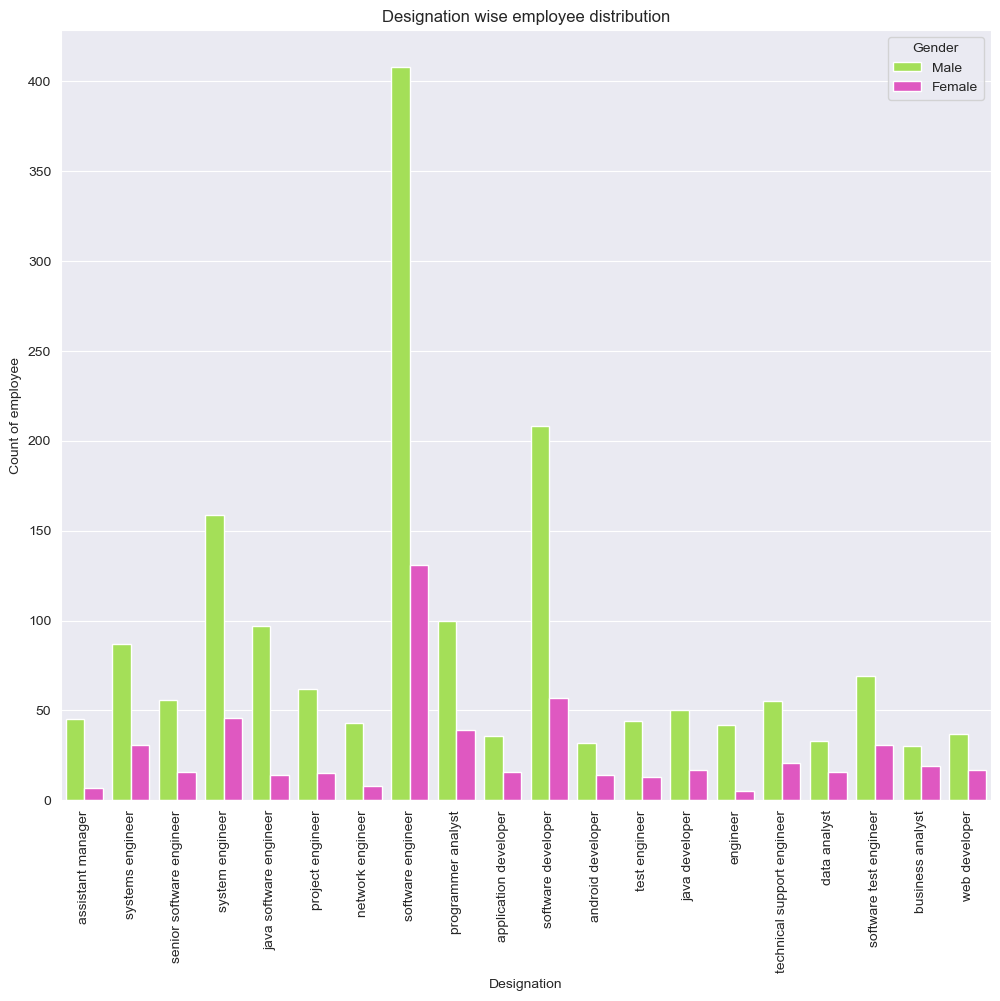

In [50]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.countplot(x="Designation",hue="Gender",data=data,palette=["#a7f542","#f542ce"])
plt.title("Designation wise employee distribution")
plt.xlabel("Designation")
plt.ylabel("Count of employee")
plt.xticks(rotation=90)
plt.show()

* From the above figure we can conclude that Male and Female employees have a tendency in Software Engineering jobrole,
then Software Developer,then System Engineer and so on

# Bivariate Analysis

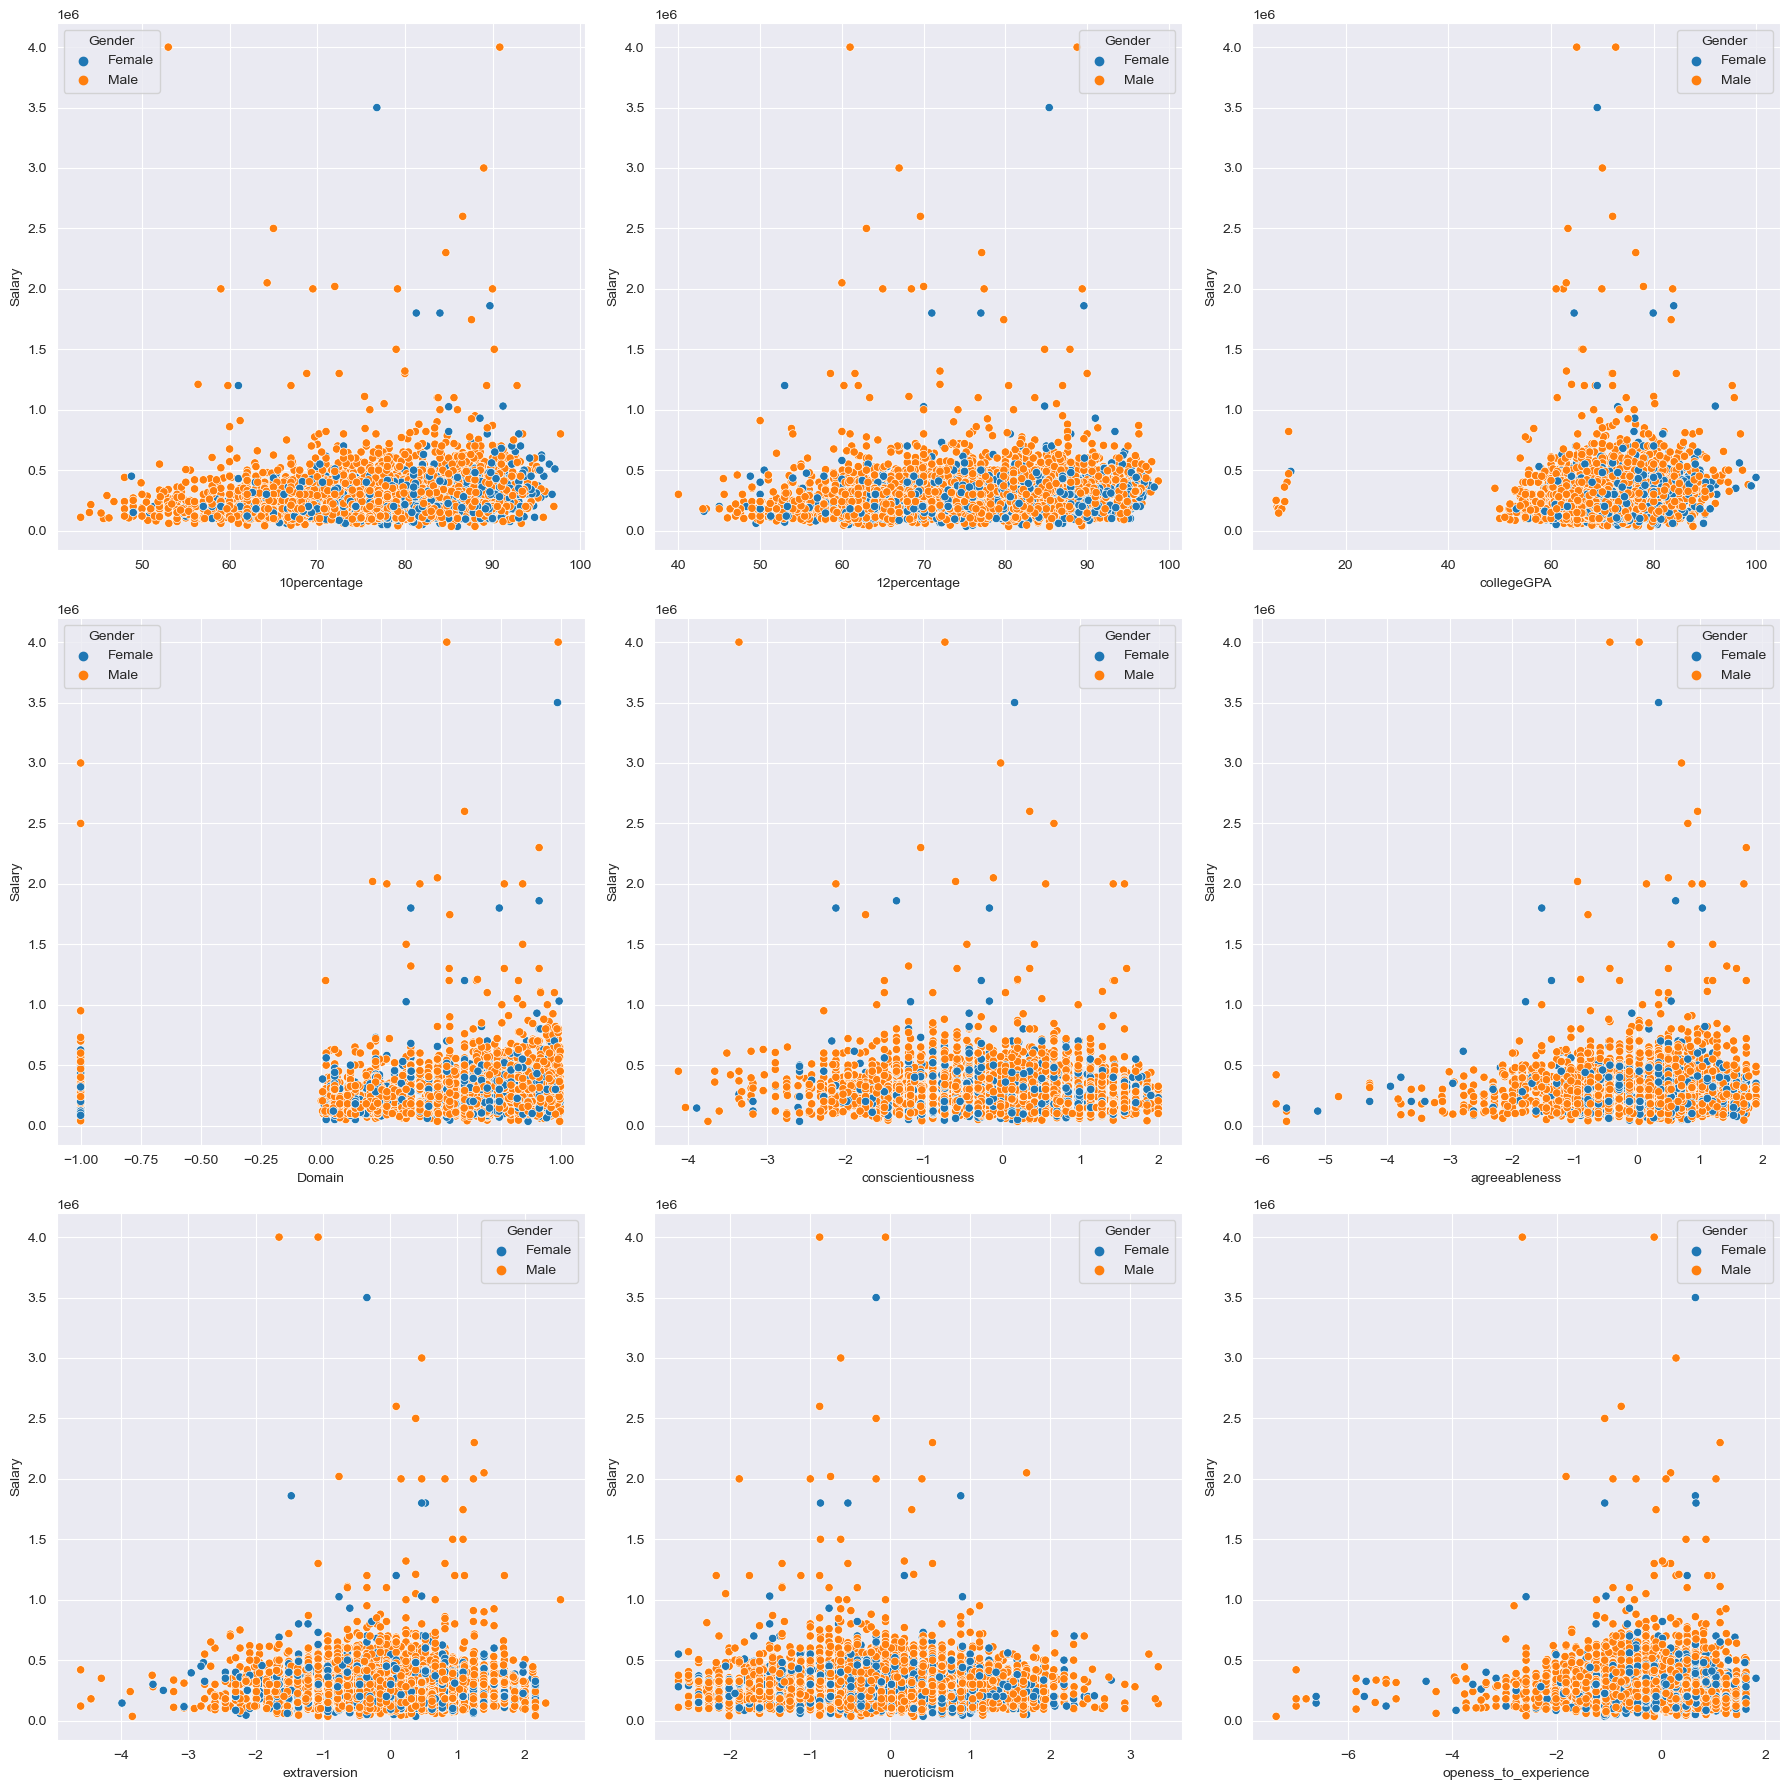

In [52]:
# Select the columns of float64 data type
float_cols = df.select_dtypes(include=['float64']).columns

# Define the number of rows and columns for subplots
n_rows = (len(float_cols) + 2) // 3  # Round up to the nearest integer
n_cols = 3

# Create subplots with specified dimensions
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6*n_rows))

# Iterate through float64 columns and create scatter plots
for i, ax in enumerate(axes.flatten()):
    if i < len(float_cols):
        sns.scatterplot(x=df[float_cols[i]], y=df['Salary'],hue=df['Gender'] ,ax=ax)
        ax.set_xlabel(float_cols[i])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

* Above scatter plots shows the relationship between Salary and other features from dataset and 
we can see that 10percentages ,collegeGPA, and 12thpercentage of students having some relation with salary and 
other features are also having slight relation with salary nut they are not linear with salary.

<AxesSubplot:>

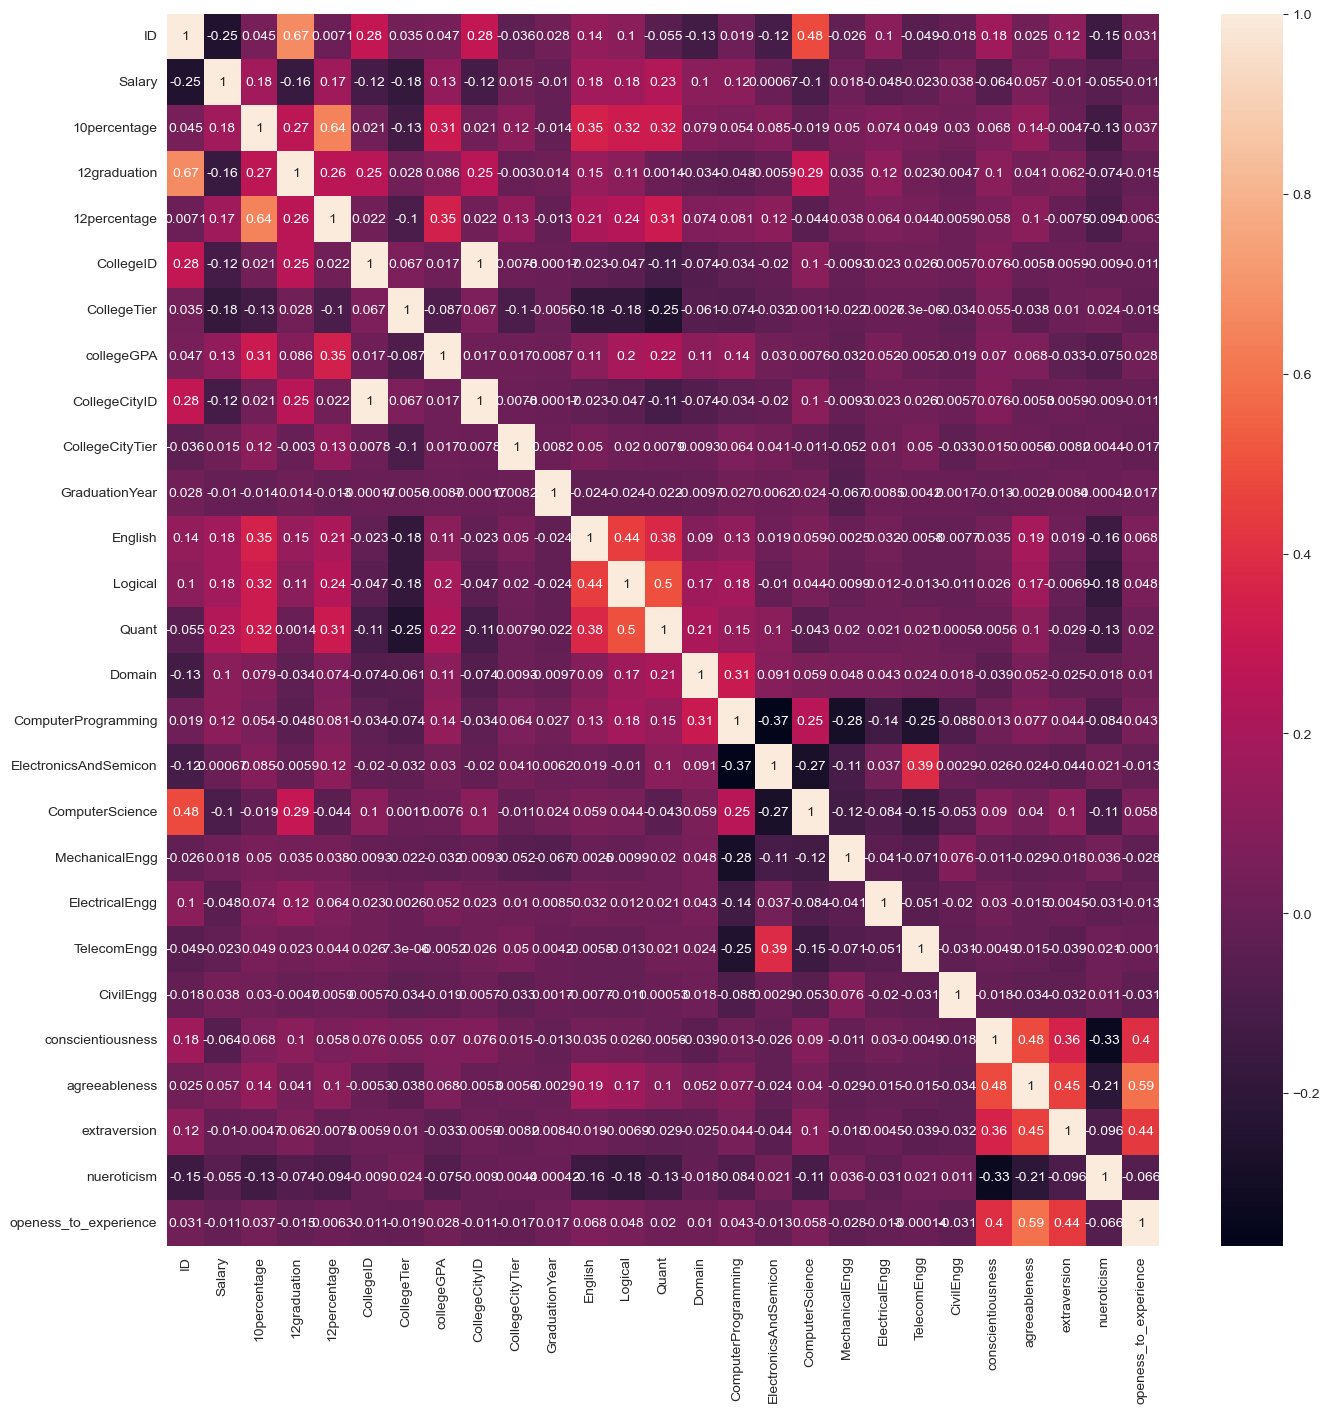

In [53]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

* The heatmap above represents the correlation between different features of the data.
* The darker colors indicate strong positive correlation while the lighter colors indicate weak correlation.
* From the heatmap, it can be observed that the 10th percentage of students is strongly correlated with their 12th percentage,
and the Quant scores are correlated with Logical scores.
* Additionally, there is a strong positive correlation between openness to experience and agreeableness.

# Relationship of 12th Percentage and Salary

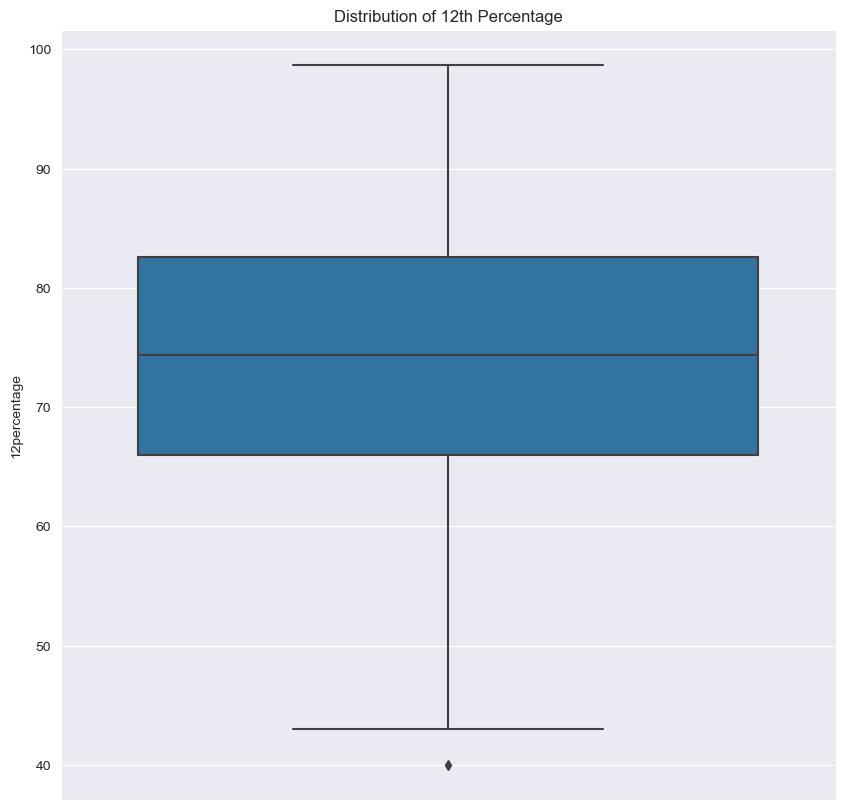

In [56]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,y="12percentage")
plt.title("Distribution of 12th Percentage")
plt.show()

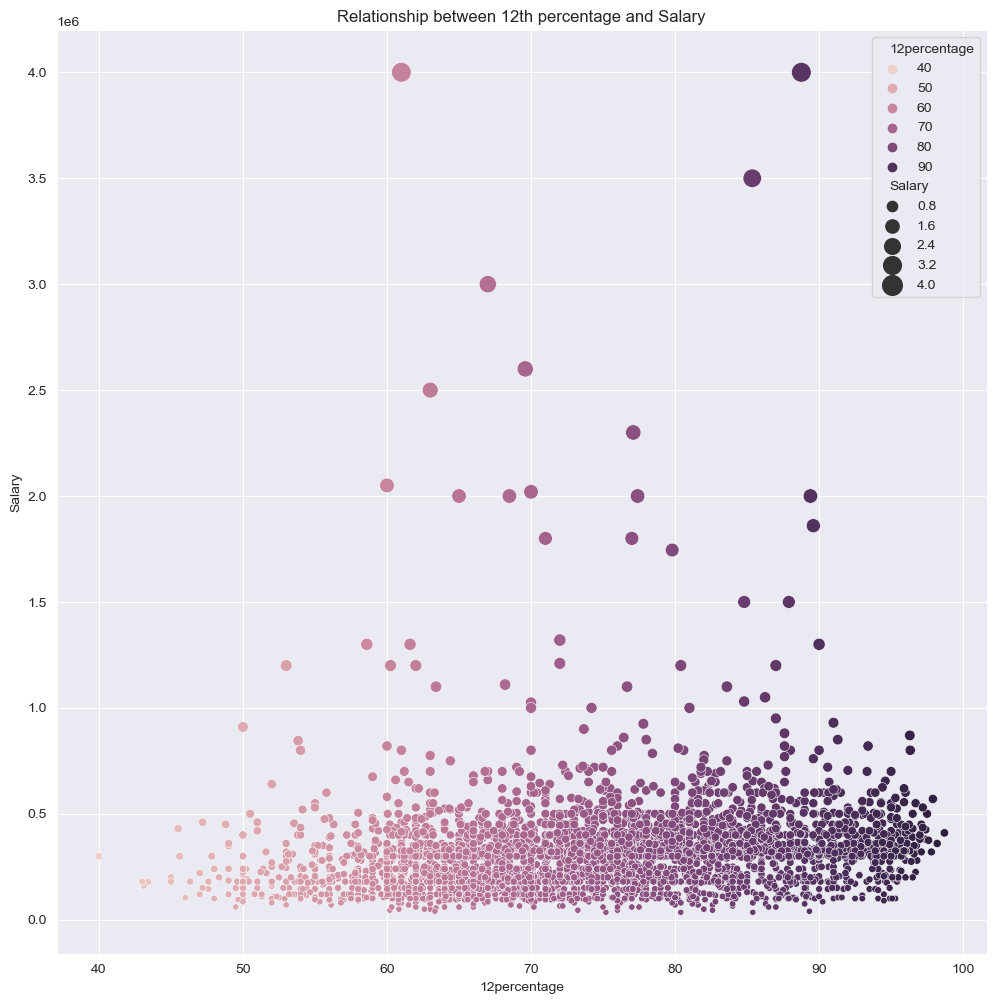

In [96]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data = df, x="12percentage", y="Salary", size="Salary", sizes=(20, 200), hue = "12percentage")
plt.title("Relationship between 12th percentage and Salary")
plt.show()

In [97]:
df["12percentage"].median()

74.4

In [98]:
df["12percentage"].mean()

74.46636568284127

In [99]:
df.Salary.mean()

307699.8499249625

* we can see that the maximum student got the marks in between 65-90(approx) and their avarage salary is 3-3.2 lakhs per annum
* Median of class 12 percentage is 74.4

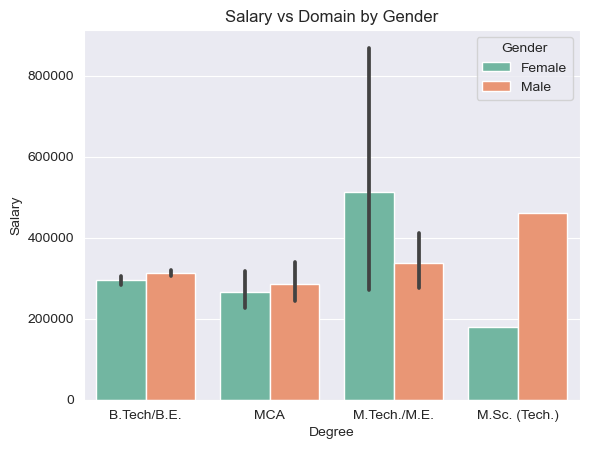

In [62]:
sns.barplot(x='Degree', y='Salary', hue='Gender', data=df, palette='Set2')
plt.title('Salary vs Domain by Gender')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

* From the above plot we can see that mostly females are M.tech/M.E and mostly males are M.Sc.(Tech)

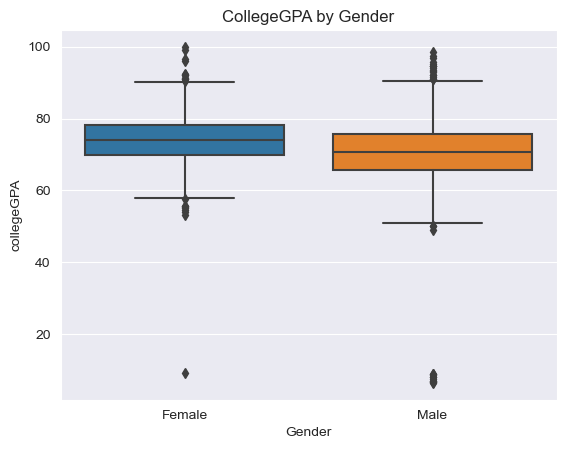

In [63]:
sns.boxplot(x='Gender', y='collegeGPA', data=df)
plt.title('CollegeGPA by Gender')
plt.show()

* From the above plot shows that GPA of males and females is not having much difference.

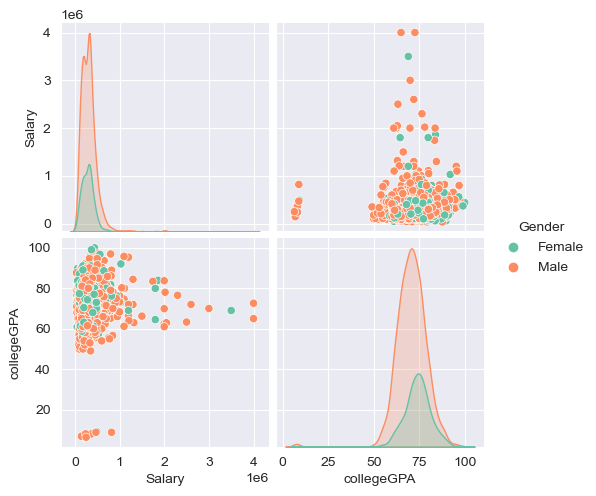

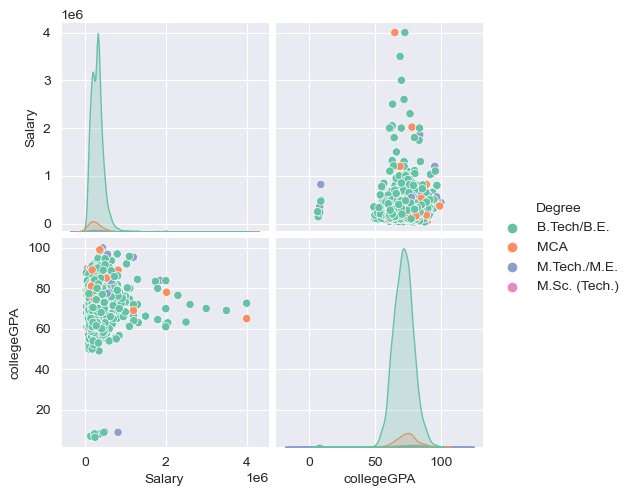

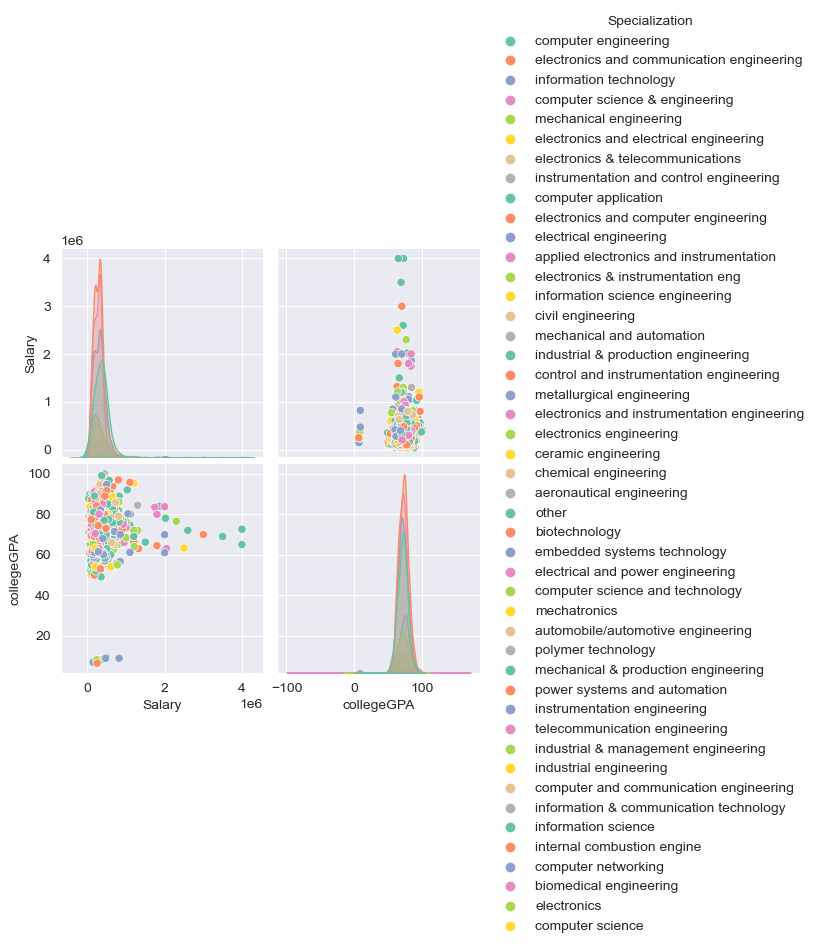

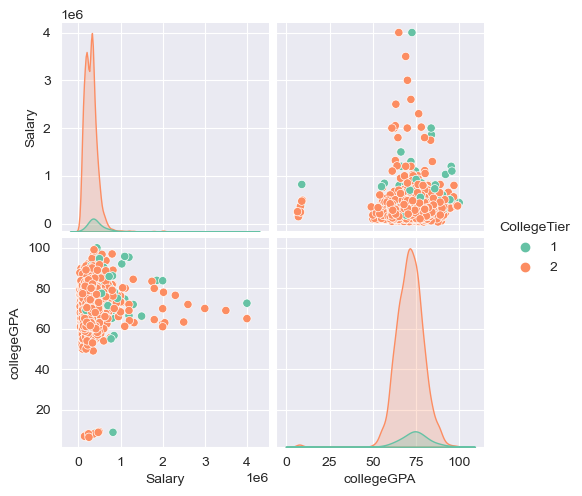

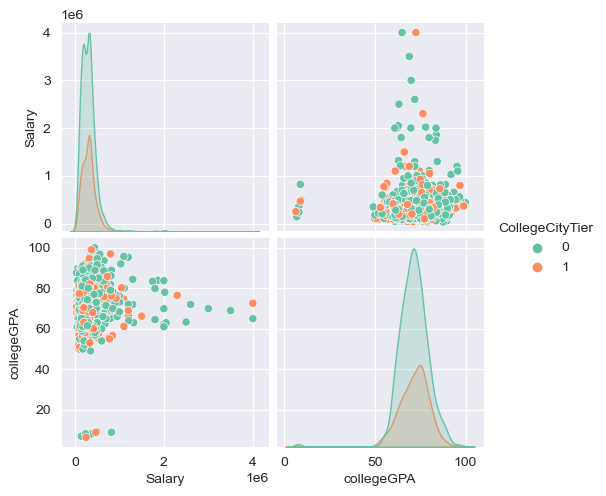

In [64]:
# Select the columns to analyze
columns = ['Gender', 'Degree', 'Specialization', 'CollegeTier', 'CollegeCityTier']

# Plot the pairplot for the selected columns
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='Gender', palette='Set2')
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='Degree', palette='Set2')
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='Specialization', palette='Set2')
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='CollegeTier', palette='Set2')
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='CollegeCityTier', palette='Set2')
plt.show()

<AxesSubplot:xlabel='Degree', ylabel='Domain'>

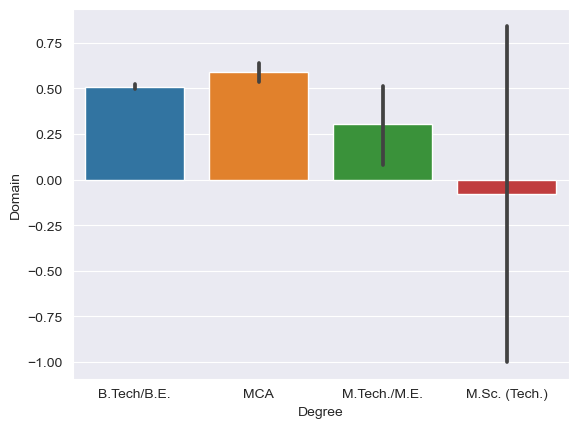

In [65]:
sns.barplot(x=df['Degree'],y = df['Domain'])

* From the above barplot we can observe that MCA graduates are scoring high in there respective Domain .

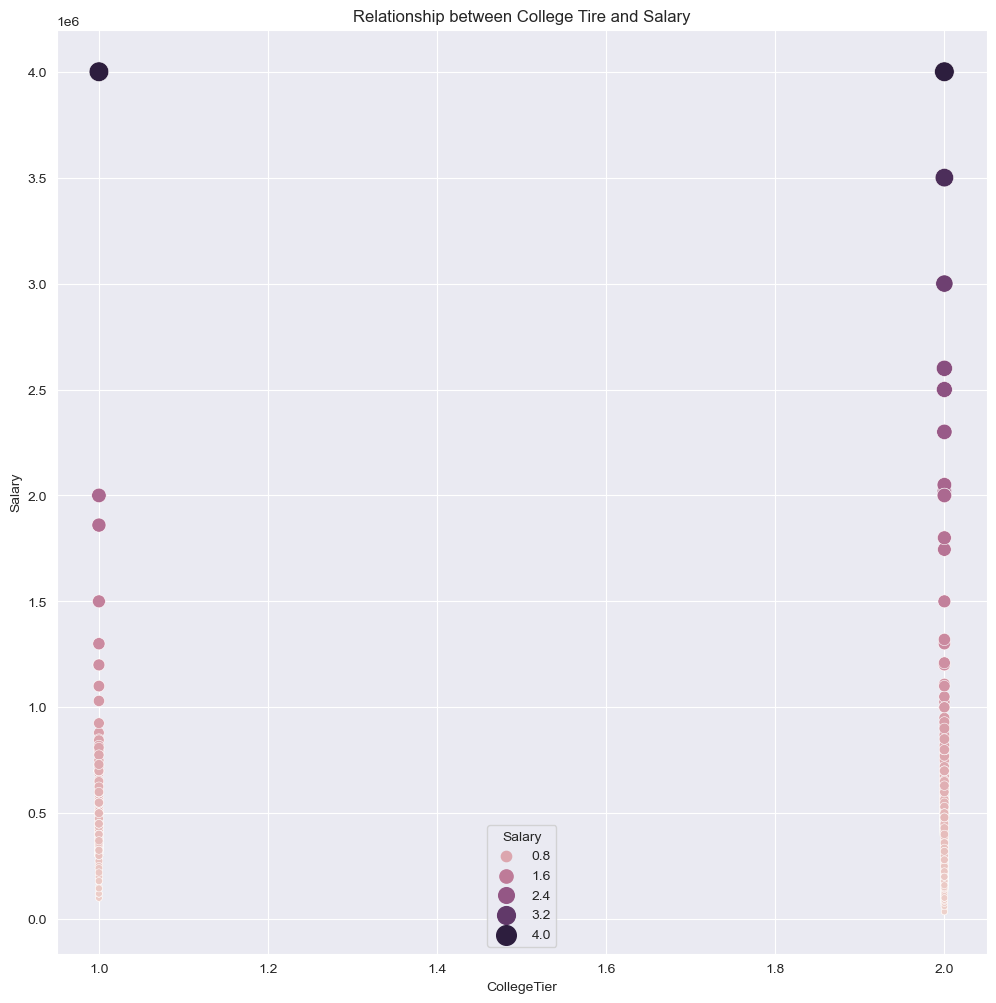

In [100]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data = df, x="CollegeTier", y="Salary", size="Salary", sizes=(20, 200), hue = "Salary")
plt.title("Relationship between College Tire and Salary")
plt.show()

In [101]:
# tire-1 college avarage package
df[df["CollegeTier"] == 1].Salary.mean()

442356.90235690237

In [102]:
# tire-2 college avarage package
df[df["CollegeTier"] == 2].Salary.mean()

296893.8124831127

* From the above plot we can easily say that the tier-1 college candidates mostly get the package below of 900k per annum and some caandidates get salary more than 1M but the tire-2 college students also get the packages mostly in between 500k to 1M but there are many candidates who got the salary of more than 1M
* The avarage package for Tire-1 college is 442356.90 but for tire-2 college is 296893.81  , which is quite less than tire-1
* So we can somewhat say being a student of tire-1 or tire-2 college it have little impact on salary but with skill, experiance it can be altered

# Research Questions

# 1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [66]:
df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [71]:
filter_data = df.loc[df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]

In [72]:
filter_data.head(2)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
19,466888,325000,2014-09-01,present,software engineer,Pune,Female,1990-11-30,79.0,cbse,...,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295
20,140069,320000,2010-11-01,2012-09-01 00:00:00,software engineer,Bangalore,Female,1988-07-25,91.2,karnataka secondary school of examination,...,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444


In [73]:
filter_data['Designation'].value_counts()

software engineer     539
programmer analyst    139
hardware engineer       8
associate engineer      6
Name: Designation, dtype: int64

In [75]:
avg_sal = filter_data['Salary'].median()

In [76]:
avg_sal

325000.0

In [77]:
sal_df=filter_data.groupby(["Designation","Specialization"])["Salary"].mean()

In [78]:
sal_df

Designation         Specialization                             
associate engineer  computer application                            80000.000000
                    computer engineering                           180000.000000
                    computer science & engineering                 332500.000000
                    electronics and communication engineering      515000.000000
                    information technology                         300000.000000
hardware engineer   electrical engineering                         240000.000000
                    electronics and communication engineering      268333.333333
                    electronics engineering                        400000.000000
programmer analyst  computer application                           347500.000000
                    computer engineering                           371346.153846
                    computer science & engineering                 323846.153846
                    electrical engineering   

* we can see the average salary for every designation

In [79]:
if avg_sal >= 250000 and  avg_sal <= 300000:
    print("The claim is true.")
else:
    print("The claim is false.")

The claim is false.


In [81]:
from scipy import stats

# calculate z-scores for the salary column
z_scores = stats.zscore(filter_data['Salary'])

# find absolute z-scores greater than 3 (or any other threshold you choose)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2)

# create a new dataframe with only the filtered entries
df_filtered = filter_data[filtered_entries]

C:\Users\lavak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

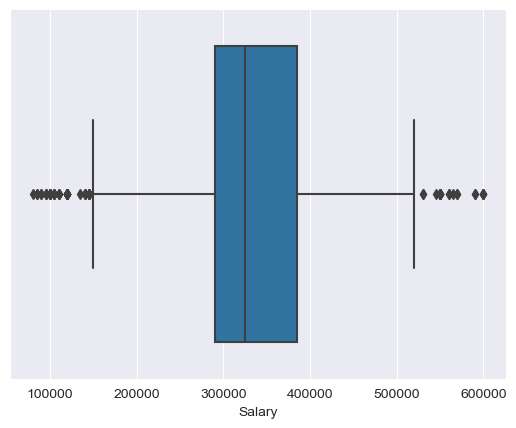

In [82]:
sns.boxplot(df_filtered['Salary'])

In [83]:
df_filtered.shape

(667, 38)

In [84]:
df_filtered['Salary'].mean()

325809.5952023988

In [85]:
df_filtered['Salary'].median()

325000.0

# Hypothesis Testing [T-test]

* Null Hypothesis (Ho):The average salary of fresh computer science engineering graduates working as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer is less than or equal to Rs. 2.5 lakhs per annum.

Ho: mu <= 2.5

* Alternate Hypothesi (Ha):The average salary of fresh computer science engineering graduates working as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer is less than or equal to Rs. 2.5 lakhs per annum.

Ha: mu > 2.5

In [103]:
job_group = df_filtered.groupby('Designation')

In [104]:
job_salary_mean = job_group['Salary'].mean()

In [105]:
job_salary_std = job_group['Salary'].std()

In [106]:
print("Mean salaries for different job roles:")
print(job_salary_mean)
print("\nStandard deviation of salaries for different job roles:")
print(job_salary_std)

Mean salaries for different job roles:
Designation
associate engineer    290000.000000
hardware engineer     281250.000000
programmer analyst    337608.695652
software engineer     323757.281553
Name: Salary, dtype: float64

Standard deviation of salaries for different job roles:
Designation
associate engineer    149097.283677
hardware engineer     128473.176745
programmer analyst     54048.563562
software engineer     107530.238804
Name: Salary, dtype: float64


In [107]:
from scipy.stats import ttest_ind

In [108]:
# set the significance level
alpha = 0.05

In [109]:
from scipy.stats import ttest_1samp

# extract the salary data for each job role
prog_analyst_salaries = df_filtered.loc[df_filtered['Designation'] == 'programmer analyst', 'Salary'].values
software_eng_salaries = df_filtered.loc[df_filtered['Designation'] == 'software engineer', 'Salary'].values
hardware_eng_salaries = df_filtered.loc[df_filtered['Designation'] == 'hardware engineer', 'Salary'].values
assoc_eng_salaries = df_filtered.loc[df_filtered['Designation'] == 'associate engineer', 'Salary'].values

# set the expected salary range according to the claim in the article
expected_range = (250000, 300000)

# perform a one-sample t-test for each job role
for job, salaries in [("programmer analyst", prog_analyst_salaries),
                      ("software engineer", software_eng_salaries),
                      ("hardware engineer", hardware_eng_salaries),
                      ("associate engineer", assoc_eng_salaries)]:
    # perform the one-sample t-test
    t_stat, p_val = ttest_1samp(salaries, expected_range[0], alternative='greater')
    
    # print the results
    print(f"One-sample t-test for {job}:")
    print(f"  t-statistic: {t_stat:.2f}")
    print(f"  p-value: {p_val:.6f}")
    
    # check for statistical significance
    if p_val < 0.05:
        print("  Result: Reject null hypothesis")
    else:
        print("  Result: Fail to reject null hypothesis")

One-sample t-test for programmer analyst:
  t-statistic: 19.04
  p-value: 0.000000
  Result: Reject null hypothesis
One-sample t-test for software engineer:
  t-statistic: 15.57
  p-value: 0.000000
  Result: Reject null hypothesis
One-sample t-test for hardware engineer:
  t-statistic: 0.69
  p-value: 0.256802
  Result: Fail to reject null hypothesis
One-sample t-test for associate engineer:
  t-statistic: 0.66
  p-value: 0.270062
  Result: Fail to reject null hypothesis


# Conclusion


* Based on the results of the one-sample t-tests, we can draw the following conclusions:

* For programmer analyst and software engineer job roles, we reject the null hypothesis that the mean salary is less than or equal to 250,000 at a significance level of 0.05. This means that there is sufficient evidence to support the claim in the Times of India article that fresh graduates in these job roles can earn up to 2.5-3 lakhs.

* For hardware engineer and associate engineer job roles, we fail to reject the null hypothesis that the mean salary is less than or equal to 250,000 at a significance level of 0.05. This means that we do not have sufficient evidence to support the claim in the Times of India article for these job roles. However, it's worth noting that the sample sizes for these job roles are relatively small, which may have affected our ability to detect a significant difference.

# 2. Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


# Chi-Square Test

* Null hypothesis: There is no relationship between gender and specialization. In other words, the preference for specialization is independent of gender.

* Alternative hypothesis: There is a relationship between gender and specialization. In other words, the preference for specialization is dependent on gender.

In [110]:
df_combined = df.copy()

In [111]:
df_combined['Specialization'] = df_combined['Specialization'].replace(['computer science & engineering', 'computer science and technology', 'computer engineering', 'computer application', 'computer science','computer and communication engineering','computer networking'], 'computer science')
df_combined['Specialization'] = df_combined['Specialization'].replace(['electronics and communication engineering', 'electronics & telecommunications', 'electronics and electrical engineering', 'electronics & instrumentation eng', 'electronics and instrumentation engineering', 'electronics and computer engineering', 'applied electronics and instrumentation', 'embedded systems technology', 'polymer technology', 'ceramic engineering', 'electronics','telecommunication'], 'electronics and communication')
df_combined['Specialization'] = df_combined['Specialization'].replace(['information technology', 'information science engineering', 'information & communication technology', 'information science'], 'information technology')
df_combined['Specialization'] = df_combined['Specialization'].replace(['mechanical engineering', 'mechanical and automation', 'mechanical & production engineering'], 'mechanical')
df_combined['Specialization'] = df_combined['Specialization'].replace(['electrical engineering', 'electrical and power engineering'], 'electrical')
df_combined['Specialization'] = df_combined['Specialization'].replace(['instrumentation and control engineering', 'control and instrumentation engineering'], 'instrumentation and control')
df_combined['Specialization'] = df_combined['Specialization'].replace(['telecommunication engineering'], 'telecommunication')
df_combined['Specialization'] = df_combined['Specialization'].replace(['biotechnology', 'biomedical engineering'], 'biotech')
df_combined['Specialization'] = df_combined['Specialization'].replace(['industrial & production engineering', 'industrial engineering', 'industrial & management engineering'], 'industrial')
df_combined['Specialization'] = df_combined['Specialization'].replace(['internal combustion engine','power systems and automation','aeronautical engineering','mechatronics','automobile/automotive engineering'],'other')

In [112]:
df_combined['Specialization'].value_counts()

computer science                 1598
electronics and communication    1272
information technology            690
mechanical                        207
electrical                         84
civil engineering                  29
other                              27
instrumentation and control        21
electronics engineering            19
biotech                            17
industrial                         13
chemical engineering                9
telecommunication                   6
instrumentation engineering         4
metallurgical engineering           2
Name: Specialization, dtype: int64

In [114]:
contingency_table = pd.crosstab(df_combined['Gender'], df_combined['Specialization'])

In [115]:
contingency_table

Specialization,biotech,chemical engineering,civil engineering,computer science,electrical,electronics and communication,electronics engineering,industrial,information technology,instrumentation and control,instrumentation engineering,mechanical,metallurgical engineering,other,telecommunication
Gender,,,,,,,,,,,,,,,
Female,11,1,6,420,17,291,3,3,183,9,0,10,0,2,1
Male,6,8,23,1178,67,981,16,10,507,12,4,197,2,25,5


In [117]:
from scipy.stats import chi2_contingency

In [118]:
# Calculate expected frequencies
expected_freq = np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / len(df_combined)

In [119]:
# calculate expected frequencies
chi2, pval, dof, expected = chi2_contingency(contingency_table)

In [120]:
# Print results
print('Chi-Square Test Statistic:', chi2)
print('P-value:', pval)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:\n', expected)

Chi-Square Test Statistic: 77.72068172597523
P-value: 7.472374083910631e-11
Degrees of Freedom: 14
Expected Frequencies:
 [[4.06928464e+00 2.15432716e+00 6.94172086e+00 3.82512756e+02
  2.01070535e+01 3.04478239e+02 4.54802401e+00 3.11180590e+00
  1.65165083e+02 5.02676338e+00 9.57478739e-01 4.95495248e+01
  4.78739370e-01 6.46298149e+00 1.43621811e+00]
 [1.29307154e+01 6.84567284e+00 2.20582791e+01 1.21548724e+03
  6.38929465e+01 9.67521761e+02 1.44519760e+01 9.88819410e+00
  5.24834917e+02 1.59732366e+01 3.04252126e+00 1.57450475e+02
  1.52126063e+00 2.05370185e+01 4.56378189e+00]]


# Conclusion

* Based on the output, the Chi-Square Test Statistic is 73.90340772614098 and the p-value is 2.199071257456986e-11, with 11 degrees of freedom. Since the p-value is less than the significance level of 0.05, we can reject the null hypothesis. Therefore, we can conclude that there is a relationship between gender and specialization. The preference for specialization is not independent of gender. 